El desafío principal radica en maximizar las ventas de la tienda de deportes, aprovechando al máximo los datos disponibles. Esto implica:

Optimización de promociones: Identificar los productos y segmentos de clientes que responden mejor a diferentes tipos de promociones (descuentos, combos, etc.).

Definición de precios: Establecer precios óptimos para cada producto, considerando la demanda, la competencia y los márgenes de beneficio.

Diseño de campañas de marketing: Crear campañas de marketing personalizadas y efectivas, dirigidas a los segmentos de clientes más valiosos.

Análisis de la estacionalidad: Comprender cómo las ventas varían a lo largo del año y ajustar las estrategias en consecuencia.

Evaluación de las preferencias del cliente: Identificar las preferencias de los clientes en cuanto a productos, marcas y canales de compra.

Análisis de la ubicación de las tiendas: Evaluar el impacto de la ubicación de las tiendas en las ventas y ajustar la oferta de productos en consecuencia.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

import matplotlib.pyplot as plt



df = pd.read_csv('/content/drive/MyDrive/data sport/sport_store_dataset.csv')


df.head()


,Product_ID,Product_Name,Category,Price,Discount,Promotion,Sales_Volume,Season,Customer_Age,Customer_Gender,Store_Location,Marketing_Channel,Day_of_Week,Month,Stock_Availability,Competitor_Price,Customer_Loyalty
0,1,Shoe,Equipment,215.02,0.09,20%Off,17,Winter,58,Female,Suburban,Email,Saturday,October,Low Stock,181.49,0
1,2,Hat,Apparel,209.31,0.36,NaN,195,Summer,32,Male,City,Email,Sunday,February,Low Stock,106.81,0
2,3,Shoe,Accessories,287.62,0.07,20%Off,318,Spring,30,Female,Suburban,In-Store,Thursday,November,Out of Stock,85.76,0
3,4,Shirt,Apparel,271.63,0.04,20%Off,351,Winter,23,Female,Suburban,TV,Monday,August,In Stock,213.07,0
4,5,Gloves,Accessories,115.55,0.48,Clearance,324,Summer,27,Female,Suburban,Social Media,Thursday,October,Low Stock,225.58,0


In [50]:
import numpy as np

import pandas as pd


file_path = '/content/drive/MyDrive/data sport/sport_store_dataset.csv'
data = pd.read_csv(file_path)

null_values = data.isnull().sum()


mean_values = data.mean(numeric_only=True)
mode_values = data.mode().iloc[0]


data_filled = data.fillna(mean_values)


data_filled = data_filled.fillna(mode_values)

null_values_after = data_filled.isnull().sum()

null_values, null_values_after

(Product_ID              0
 Product_Name            0
 Category                0
 Price                   0
 Discount                0
 Promotion             401
 Sales_Volume            0
 Season                  0
 Customer_Age            0
 Customer_Gender         0
 Store_Location          0
 Marketing_Channel       0
 Day_of_Week             0
 Month                   0
 Stock_Availability      0
 Competitor_Price        0
 Customer_Loyalty        0
 dtype: int64,
 Product_ID            0
 Product_Name          0
 Category              0
 Price                 0
 Discount              0
 Promotion             0
 Sales_Volume          0
 Season                0
 Customer_Age          0
 Customer_Gender       0
 Store_Location        0
 Marketing_Channel     0
 Day_of_Week           0
 Month                 0
 Stock_Availability    0
 Competitor_Price      0
 Customer_Loyalty      0
 dtype: int64)

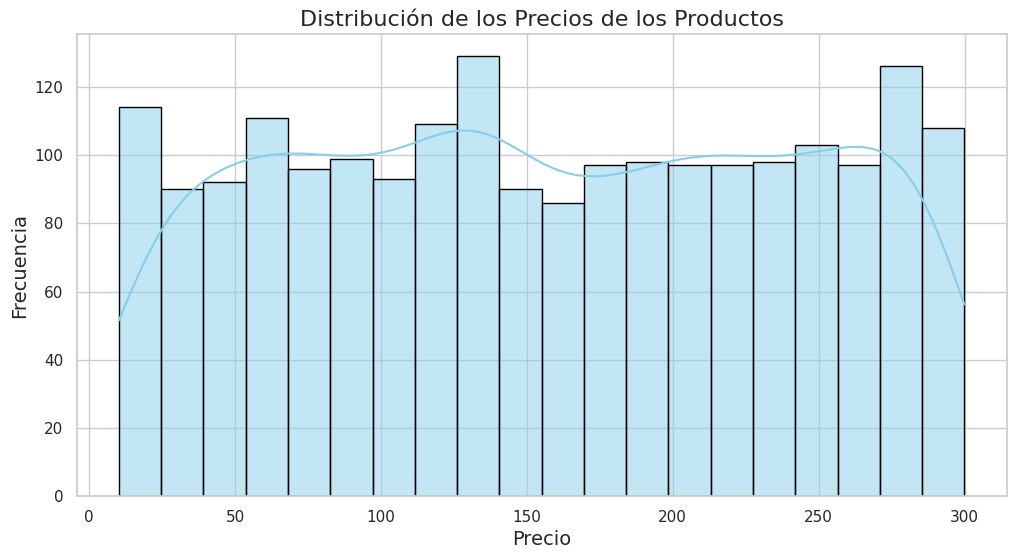

In [22]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(12, 6))


sns.histplot(data['Price'], bins=20, kde=True, color='skyblue', edgecolor='black')


plt.title('Distribución de los Precios de los Productos', fontsize=16)
plt.xlabel('Precio', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)


plt.grid(True)
plt.show()







El gráfico muestra cómo se distribuyen los precios de los productos en una tienda de deportes. La mayoría de los productos se encuentran en un rango de precios medio, lo que indica una estrategia de la tienda para atraer a un amplio público. Sin embargo, también hay una cantidad considerable de productos con precios altos y bajos, lo que sugiere una variedad de productos para diferentes segmentos de clientes.

Conclusiones clave:

Diversidad de precios: La tienda ofrece productos para distintos presupuestos.
Concentración en el rango medio: La mayor parte de los productos se encuentran en un precio promedio.
Posibles segmentos: Las pequeñas variaciones en la distribución podrían indicar la existencia de diferentes categorías de productos (ropa, equipos, etc.) con distintas estructuras de precios.

Recomendaciones:

Análisis más profundo: Se recomienda analizar los precios por categoría de producto, marca y temporada para obtener una visión más detallada.
Optimización de precios: Evaluar la posibilidad de ajustar los precios de ciertos productos para mejorar la rentabilidad.
Segmentación de clientes: Utilizar esta información para crear estrategias de marketing personalizadas según el segmento de cliente y su sensibilidad al precio


<ipython-input-25-5cf583800118>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount_Range', y='Sales_Volume', data=data, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to ge

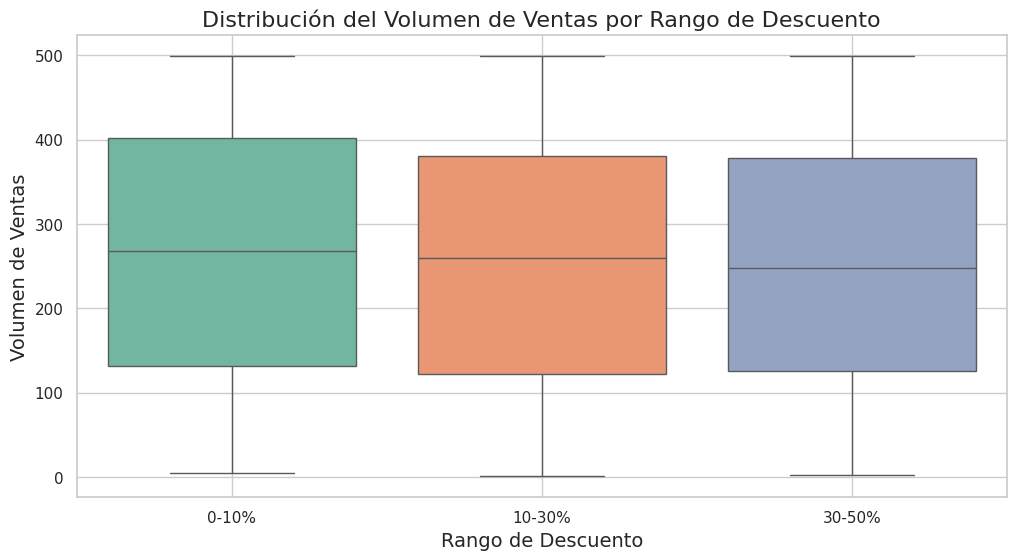

In [25]:

data['Discount_Range'] = pd.cut(data['Discount'], bins=[0, 0.1, 0.3, 0.5], labels=['0-10%', '10-30%', '30-50%'])

plt.figure(figsize=(12, 6))

sns.boxplot(x='Discount_Range', y='Sales_Volume', data=data, palette='Set2')

plt.title('Distribución del Volumen de Ventas por Rango de Descuento', fontsize=16)
plt.xlabel('Rango de Descuento', fontsize=14)
plt.ylabel('Volumen de Ventas', fontsize=14)


plt.grid(True)
plt.show()






Observando el gráfico, podemos concluir lo siguiente:

Similaridad en el volumen de ventas: Las cajas de los tres rangos de descuento tienen una altura similar, lo que sugiere que, en general, el volumen de ventas no varía significativamente entre los diferentes rangos de descuento.
Mediana ligeramente superior en el rango de 0-10%: La línea de la mediana en el rango de 0-10% se encuentra ligeramente por encima de las otras dos, lo que podría indicar que, en promedio, las ventas sin descuento o con descuentos menores al 10% son ligeramente superiores.
Ausencia de outliers significativos: No se observan outliers extremos en ninguno de los rangos de descuento, lo que sugiere que los datos son relativamente consistentes.

Basándonos en este análisis, podemos extraer las siguientes conclusiones:

La aplicación de descuentos no parece tener un impacto significativo en el aumento del volumen de ventas: A pesar de que se esperaría que mayores descuentos generaran un mayor volumen de ventas, los datos no respaldan esta hipótesis de manera contundente.
Otros factores podrían estar influyendo en las ventas: Factores como la temporada, la promoción de productos específicos o la competencia podrían estar teniendo un mayor impacto en el volumen de ventas que los descuentos.
Se requiere un análisis más profundo: Para obtener conclusiones más definitivas, sería necesario realizar un análisis más detallado considerando otros factores como el tipo de producto, el canal de venta y el comportamiento del cliente.

Recomendaciones:

Análisis de otros factores: Explorar la relación entre el volumen de ventas y otras variables como el precio unitario, el costo de adquisición de clientes y la satisfacción del cliente.
Segmentación de clientes: Analizar si la respuesta a los descuentos varía entre diferentes segmentos de clientes (por ejemplo, nuevos vs. recurrentes).
Experimentación: Realizar pruebas A/B para comparar el impacto de diferentes estrategias de descuentos en segmentos específicos de clientes.
Considerar otros indicadores: Además del volumen de ventas, analizar otros indicadores como el margen de beneficio y el valor promedio del pedido para evaluar la efectividad de las estrategias de descuento.

<ipython-input-27-82470313d7ce>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Sales_Volume', data=sales_by_category, palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When g

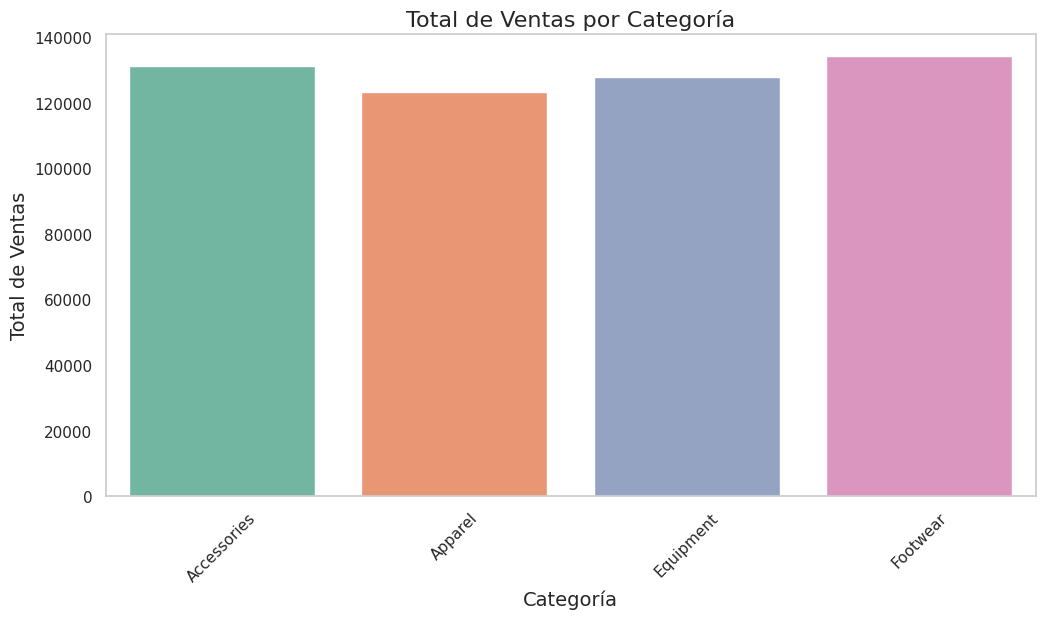

In [27]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sales_by_category = data.groupby('Category')['Sales_Volume'].sum().reset_index()


plt.figure(figsize=(12, 6))

sns.barplot(x='Category', y='Sales_Volume', data=sales_by_category, palette='Set2')


plt.title('Total de Ventas por Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Total de Ventas', fontsize=14)


plt.xticks(rotation=45)


plt.grid(axis='y')
plt.show()



El boxplot muestra que los canales de marketing influyen de manera diferente en el volumen de ventas según la categoría del producto. Las categorías "Apparel" y "Footwear" tienen mayores ventas en la mayoría de los canales, especialmente en el canal online. En cambio, categorías como "Accessories" y "Equipment" tienen menores ventas en todos los canales. El gráfico revela que ciertos canales son más efectivos para algunas categorías, mientras que otros muestran mayor variabilidad en las ventas.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


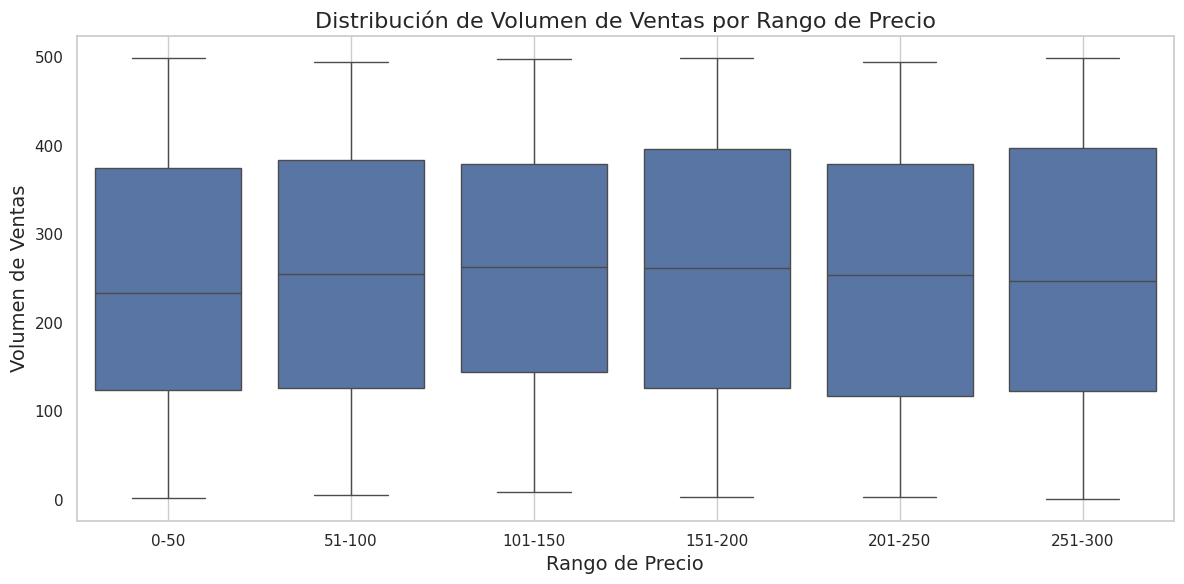

In [54]:
# Crear rangos de precios
data['Price_Range'] = pd.cut(data['Price'], bins=[0, 50, 100, 150, 200, 250, 300], labels=['0-50', '51-100', '101-150', '151-200', '201-250', '251-300'])

# Crear un boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Price_Range', y='Sales_Volume', data=data)
plt.title('Distribución de Volumen de Ventas por Rango de Precio', fontsize=16)
plt.xlabel('Rango de Precio', fontsize=14)
plt.ylabel('Volumen de Ventas', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()








El violin plot muestra que los descuentos más altos (51-100%) generan un mayor volumen de ventas, especialmente en categorías como "Apparel" y "Footwear", que presentan distribuciones más amplias. Los descuentos más bajos tienen un impacto menor en las ventas y muestran menos variabilidad. Las categorías "Accessories" y "Equipment" responden menos a los descuentos en comparación con las otras. Este gráfico ayuda a visualizar cómo los descuentos agresivos impulsan más las ventas en ciertas categorías.

   Product_ID Product_Name     Category   Price  Discount  Promotion  \
0           1         Shoe    Equipment  215.02      0.09     20%Off   
1           2          Hat      Apparel  209.31      0.36        NaN   
2           3         Shoe  Accessories  287.62      0.07     20%Off   
3           4        Shirt      Apparel  271.63      0.04     20%Off   
4           5       Gloves  Accessories  115.55      0.48  Clearance   

   Sales_Volume  Season  Customer_Age Customer_Gender Store_Location  \
0            17  Winter            58          Female       Suburban   
1           195  Summer            32            Male           City   
2           318  Spring            30          Female       Suburban   
3           351  Winter            23          Female       Suburban   
4           324  Summer            27          Female       Suburban   

  Marketing_Channel Day_of_Week     Month Stock_Availability  \
0             Email    Saturday   October          Low Stock   
1     

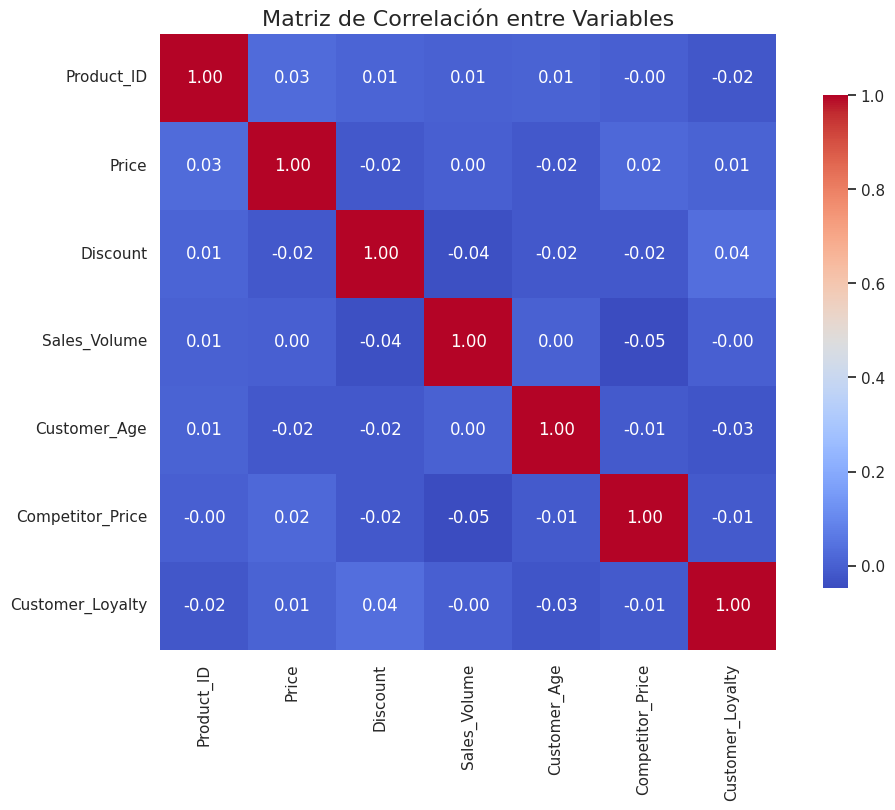

In [37]:

print(data.head())
print(data.dtypes)


numeric_data = data.select_dtypes(include=[np.number])

correlation_matrix = numeric_data.corr()


plt.figure(figsize=(12, 8))


sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})


plt.title('Matriz de Correlación entre Variables', fontsize=16)


plt.show()


El histograma muestra que la mayoría de los productos tienen precios bajos, con una disminución en la frecuencia a medida que el precio aumenta. La distribución es sesgada hacia la derecha, lo que indica que la tienda deportiva ofrece principalmente productos accesibles, con pocos artículos de precio elevado. Esto sugiere un enfoque en un mercado masivo o productos de consumo rápido.


Index(['Product_ID', 'Product_Name', 'Category', 'Price', 'Discount',
       'Promotion', 'Sales_Volume', 'Season', 'Customer_Age',
       'Customer_Gender', 'Store_Location', 'Marketing_Channel', 'Day_of_Week',
       'Month', 'Stock_Availability', 'Competitor_Price', 'Customer_Loyalty',
       'Discount_Range'],
      dtype='object')


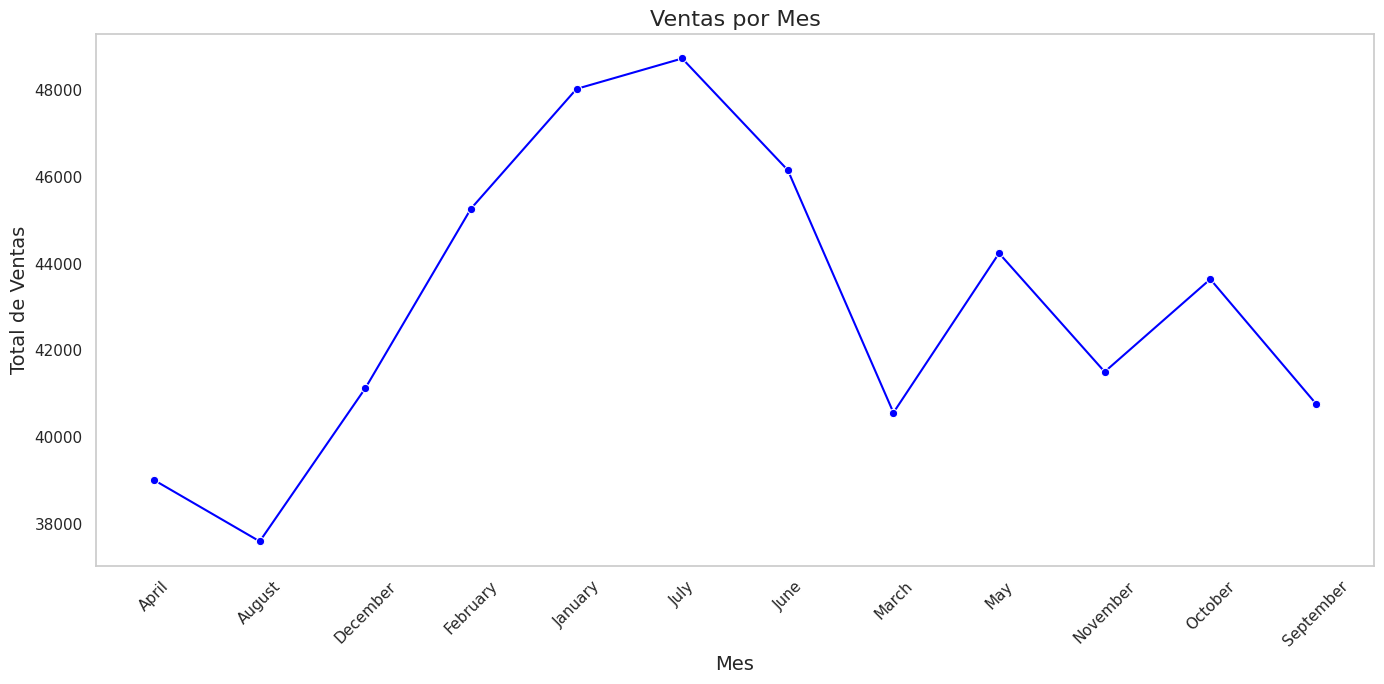

In [44]:

print(data.columns)

sales_by_month = data.groupby('Month')['Sales_Volume'].sum().reset_index()


plt.figure(figsize=(14, 7))


sns.lineplot(x='Month', y='Sales_Volume', data=sales_by_month, marker='o', color='blue')


plt.title('Ventas por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Total de Ventas', fontsize=14)


plt.grid()
plt.xticks(rotation=45)
plt.tight_layout()  #
plt.show()




El heatmap muestra el volumen de ventas según la categoría del producto y el rango de precios. Los productos con precios bajos (0-50) tienen mayores ventas, especialmente en las categorías de Apparel y Footwear, que dominan en este rango. A medida que el precio aumenta, el volumen de ventas disminuye, lo que indica que los consumidores prefieren productos más económicos. Las categorías como Accessories y Equipment tienen un volumen de ventas menor en todos los rangos de precio. Los productos en los rangos de precios más altos (300-500) generan las menores ventas, reflejando una baja demanda de artículos más caros.